In [1]:
import requests
from glob import glob
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from time import sleep
# import re

In [2]:
# http://www.networkinghowtos.com/howto/common-user-agent-list/
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [3]:
url = 'https://www.amazon.es/Nikon-D750-AF-S-24-120-VR/dp/B00NMD804A/ref=sr_1_4?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=nikon+24+120&qid=1590338558&quartzVehicle=106-1339&replacementKeywords=nikon+24&sr=8-4'

In [4]:
page = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(page.content, features="lxml")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-es"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/><link href="https://m.media-amazon.com" rel="dns-prefetch"/><link href="https://completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])}
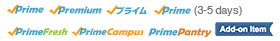
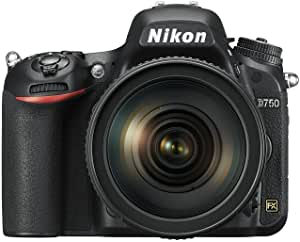

In [5]:
soup

In [ ]:
prod_tracker = pd.read_csv('trackers/TRACKER_PRODUCTS.csv', sep=';')
prod_tracker_URLS = prod_tracker.url
prod_tracker

In [ ]:
tracker_log = pd.DataFrame()

###### tracking function - keeps cycling through url's

for x, url in enumerate(prod_tracker_URLS):
    page = requests.get(url, headers=HEADERS)
    soup = BeautifulSoup(page.content, features="lxml")
    title = soup.find(id='productTitle').get_text().strip()
    try:
        price = float(soup.find(id='priceblock_ourprice').get_text().replace('.', '').replace('€', '').replace(',', '.').strip())
    except:
        price = ''
    review_score = float(soup.select('.a-star-4-5')[0].get_text().split(' ')[0].replace(",", "."))
    review_count = int(soup.select('#acrCustomerReviewText')[0].get_text().split(' ')[0].replace(".", ""))
    try:
        soup.select('#availability .a-color-state')[0].get_text().strip()
        stock = 'Out of Stock'
    except:
        stock = 'Available'
    
    now = datetime.now().strftime('%Y-%m-%d %Hh%Mm')
    log = pd.DataFrame({'date': now,
                        'code': prod_tracker.code[x],
                        'url': url,
                        'title': title,
                        'price': price,
                        'alert': prod_tracker.buy_below[x],
                        'review_score': review_score,
                        'review_count': review_count}, index=[x])

    tracker_log = tracker_log.append(log)
    print('appended '+ prod_tracker.code[x] +'\n' + title + '\n\n')
    sleep(5)

In [466]:
tracker_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 8 columns):
date            3 non-null object
code            3 non-null object
title           3 non-null object
url             3 non-null object
price           2 non-null float64
alert           3 non-null int64
review_score    3 non-null float64
review_count    3 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 216.0+ bytes


In [467]:
tracker_log.to_excel('search_history/SEARCH_HISTORY.xlsx', index=False)

In [504]:
search_product_list()

appended PS4_de_orig
PlayStation 4 Pro - Konsole (1 TB, schwarz, Pro, Modell: CUH-7216B)


appended PS4_es_fifa
PlayStation 4 (PS4) +FIFA20/FUTVCH/Psy 14 días PS4 Pro 1TB G/SPA


appended PS4_es_orig
Sony Playstation 4 Pro (PS4) Consola de 1TB + 20 euros Tarjeta Prepago (Edición Exclusiva Amazon) - nuevo chasis G


appended mavicpro2_flymore_es
DJI Mavic 2 Pro + Fly More Combo - Dron con cámara Hasselblad y sensor CMOS de 1" y 20 Mpx, HDR Video - Versión EU


appended mavicpro2_flymore_de
DJI Mavic 2 Pro Fly More Combo, Drohne mit Hasselblad HDR Video Kamera und Zubehör-Kit


appended ps4_fr_orig
Sony PlayStation 4 Pro 1 To, Avec 1 manette sans fil DUALSHOCK 4 V2, Châssis G, Noir (Jet Black)


appended mavicpro2_smart_cont_es
DJI Mavic 2 Pro + Smart Controller - Dron Mavic 2 Pro con Control Remoto y Pantalla de 5.5", Incluye una Cámara Fotografica Hasselblad L1D-20c de 20 MP


appended mavicpro2_es
DJI Mavic 2 Pro + Smart Controller - Dron Mavic 2 Pro con Control Remoto y Pantalla de 5

# Code from gists in article

In [9]:
import requests
from glob import glob
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from time import sleep

# http://www.networkinghowtos.com/howto/common-user-agent-list/
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

# imports a csv file with the url's to scrape
prod_tracker = pd.read_csv('trackers/TRACKER_PRODUCTS.csv', sep=';')
prod_tracker_URLS = prod_tracker.url

# fetch the url
page = requests.get(prod_tracker_URLS[0], headers=HEADERS)

# create the object that will contain all the info in the url
soup = BeautifulSoup(page.content, features="lxml")

In [10]:
# product title
title = soup.find(id='productTitle').get_text().strip()

# to prevent script from crashing when there isn't a price for the product
try:
    price = float(soup.find(id='priceblock_ourprice').get_text().replace('.', '').replace('€', '').replace(',', '.').strip())
except:
    price = ''

# review score
review_score = float(soup.select('.a-star-4-5')[0].get_text().split(' ')[0].replace(",", "."))

# how many reviews
review_count = int(soup.select('#acrCustomerReviewText')[0].get_text().split(' ')[0].replace(".", ""))

# checking if there is "Out of stock" and if not, it means the product is available
try:
    soup.select('#availability .a-color-state')[0].get_text().strip()
    stock = 'Out of Stock'
except:
    stock = 'Available'

In [11]:
# product title
title = soup.find(id='productTitle').get_text().strip()
title

'Nikon D750 + AF-S 24-120 VR - Cámara Digital'

In [12]:
# to prevent script from crashing when there isn't a price for the product
try:
    price = float(soup.find(id='priceblock_ourprice').get_text().replace('.', '').replace('€', '').replace(',', '.').strip())
except:
    price = ''
price

1727.0

In [13]:
# review score
review_score = float(soup.select('.a-star-4-5')[0].get_text().split(' ')[0].replace(",", "."))

# how many reviews
review_count = int(soup.select('#acrCustomerReviewText')[0].get_text().split(' ')[0].replace(".", ""))

print(str(review_score) + ' out of ' + str(review_count) + ' reviews')

4.4 out of 64 reviews


In [14]:
# checking if there is "Out of stock" and if not, it means the product is available
try:
    soup.select('#availability .a-color-state')[0].get_text().strip()
    stock = 'Out of Stock'
except:
    stock = 'Available'
stock

'Available'

# Amazon_Scraper.py code

You can copy the different sections to separate cells to understand what the variables are storing. Useful also to quickly eliminate bugs that naturally appear over time!

In [ ]:
import requests
from glob import glob
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from time import sleep

# http://www.networkinghowtos.com/howto/common-user-agent-list/
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})


def search_product_list(interval_count = 1, interval_hours = 6):
    """
    This function lods a csv file named TRACKER_PRODUCTS.csv, with headers: [url, code, buy_below]
    It looks for the file under in ./trackers
    
    It also requires a file called SEARCH_HISTORY.xslx under the folder ./search_history to start saving the results.
    An empty file can be used on the first time using the script.
    
    Both the old and the new results are then saved in a new file named SEARCH_HISTORY_{datetime}.xlsx
    This is the file the script will use to get the history next time it runs.

    Parameters
    ----------
    interval_count : TYPE, optional
        DESCRIPTION. The default is 1. The number of iterations you want the script to run a search on the full list.
    interval_hours : TYPE, optional
        DESCRIPTION. The default is 6.

    Returns
    -------
    New .xlsx file with previous search history and results from current search

    """
    prod_tracker = pd.read_csv('trackers/TRACKER_PRODUCTS.csv', sep=';')
    prod_tracker_URLS = prod_tracker.url
    tracker_log = pd.DataFrame()
    now = datetime.now().strftime('%Y-%m-%d %Hh%Mm')
    interval = 0 # counter reset
    
    while interval < interval_count:

        for x, url in enumerate(prod_tracker_URLS):
            page = requests.get(url, headers=HEADERS)
            soup = BeautifulSoup(page.content, features="lxml")
            
            #product title
            title = soup.find(id='productTitle').get_text().strip()
            
            # to prevent script from crashing when there isn't a price for the product
            try:
                price = float(soup.find(id='priceblock_ourprice').get_text().replace('.', '').replace('€', '').replace(',', '.').strip())
            except:
                # this part gets the price in dollars from amazon.com store
                try:
                    price = float(soup.find(id='priceblock_saleprice').get_text().replace('$', '').replace(',', '').strip())
                except:
                    price = ''

            try:
                review_score = float(soup.select('i[class*="a-icon a-icon-star a-star-"]')[0].get_text().split(' ')[0].replace(",", "."))
                review_count = int(soup.select('#acrCustomerReviewText')[0].get_text().split(' ')[0].replace(".", ""))
            except:
                # sometimes review_score is in a different position... had to add this alternative with another try statement
                try:
                    review_score = float(soup.select('i[class*="a-icon a-icon-star a-star-"]')[1].get_text().split(' ')[0].replace(",", "."))
                    review_count = int(soup.select('#acrCustomerReviewText')[0].get_text().split(' ')[0].replace(".", ""))
                except:
                    review_score = ''
                    review_count = ''
            
            # checking if there is "Out of stock"
            try:
                soup.select('#availability .a-color-state')[0].get_text().strip()
                stock = 'Out of Stock'
            except:
                # checking if there is "Out of stock" on a second possible position
                try:
                    soup.select('#availability .a-color-price')[0].get_text().strip()
                    stock = 'Out of Stock'
                except:
                    # if there is any error in the previous try statements, it means the product is available
                    stock = 'Available'

            log = pd.DataFrame({'date': now.replace('h',':').replace('m',''),
                                'code': prod_tracker.code[x], # this code comes from the TRACKER_PRODUCTS file
                                'url': url,
                                'title': title,
                                'buy_below': prod_tracker.buy_below[x], # this price comes from the TRACKER_PRODUCTS file
                                'price': price,
                                'stock': stock,
                                'review_score': review_score,
                                'review_count': review_count}, index=[x])

            try:
                # This is where you can integrate an email alert!
                if price < prod_tracker.buy_below[x]:
                    print('************************ ALERT! Buy the '+prod_tracker.code[x]+' ************************')
            
            except:
                # sometimes we don't get any price, so there will be an error in the if condition above
                pass

            tracker_log = tracker_log.append(log)
            print('appended '+ prod_tracker.code[x] +'\n' + title + '\n\n')            
            sleep(5)
        
        interval += 1# counter update
        
        sleep(interval_hours*1*1)
        print('end of interval '+ str(interval))
    
    # after the run, checks last search history record, and appends this run results to it, saving a new file
    last_search = glob('C:/Users/Fábio/Documents/Python Projects/202005 Amazon Webscraper/search_history/*.xlsx')[-1] # path to file in the folder
    search_hist = pd.read_excel(last_search)
    final_df = search_hist.append(tracker_log, sort=False)
    
    final_df.to_excel('search_history/SEARCH_HISTORY_{}.xlsx'.format(now), index=False)
    print('end of search')